In [119]:
### 시작 및 본인정보 반영
# 반드시 이 cell을 실행하시오
# 실행하지 않을 시 직접 하지 않은 것으로 간주
# 마지막 줄 출력으로 파일명을 설정하고 제출 필수
import platform, psutil, os, datetime
print(platform.processor())
print(str(round(psutil.virtual_memory().total / (1024.0 **3)))+"(GB)")
print(platform.system())
print(platform.version())
print(os.getcwd())
print(datetime.datetime.fromtimestamp(os.path.getctime(os.getcwd())))
print(datetime.datetime.fromtimestamp(os.path.getmtime(os.getcwd())))
print(datetime.datetime.fromtimestamp(os.path.getatime(os.getcwd())))
print(datetime.datetime.now())
title = 'DA_SupervisedRegression'    # 고정값
name = '허유빈'    # 본인 이름을 작성
studentid = '202000251'    # 본인 학번을 작성
# 아래 강좌 명 중 본인이 수강하는 강과명 작성
# 비즈니스데이터사이언스이해, E정보시스템, 디지털비즈니스애널리틱스, E데이터베이스, 인공지능기반의사결정, 빅데이터 등
# 비즈니스혁신을위한데이터사이언스응용, 인공지능활용디지털경제플랫폼연구 등
course = 'E데이터베이스'    
print('다음 출력을 파일명으로 설정하고 제출하시오:', name + '_' + studentid + '_' + course + '_' + title)

Intel64 Family 6 Model 142 Stepping 11, GenuineIntel
8(GB)
Windows
10.0.22621
C:\Users\허\수업
2023-03-07 21:22:07.776971
2023-04-30 15:57:12.547950
2023-04-30 15:57:12.547950
2023-04-30 15:57:40.939831
다음 출력을 파일명으로 설정하고 제출하시오: 허유빈_202000251_E데이터베이스_DA_SupervisedRegression


# **Data Loading:** 분석에 사용할 데이터 불러오기

- 아래 `비즈니스 문제 대상 데이터`의 비즈니스 목적을 보고 `관심있는 데이터`를 선택하여 불러오기
- 모든 데이터는 [Kaggle Competition](https://www.kaggle.com/)에서 추출되었으며, `현 Jupyter Notebook`과 동일폴더에 있음
- 저장된 데이터는 아래 설명 참고링크에서 다움받은 후 `일부 전처리 후 저장`되어 있기 떄문에 다를 수 있고 `저장된 데이터만 사용`
- 개인PC에서 `pandas -> read_csv()`로 불러오기 가능하고 `Google Colab으로 로딩`도 불러와도 됨
- 모든 데이터 분석 결과들은 향후 `경진대회나 공모전 및 데이터사이언스 분야 면접이나 시험`에 대비 가능

| **분야** | **비즈니스 목적** | **파일명** | **종속변수 Y** | **설명 참고링크** |
|:---:|:---|:---|:---|:---|
| **Sports** | 러슬링 토너먼트의 선수 순위를 정확하게   예측하여 투기 승률을 향상 | `Regression_WrestlingTournamentRank.csv` | `rank` | https://www.kaggle.com/datasets/julienjta/wrestling-world-tournament |
| **Business** | 중고차 가격을 정확하게 예측하여   저평가된 중고차의 특징을 예측하여 구매전략 지원 | `Regression_UsedCarPrice.csv` | `price` | https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars |
| **Education** | 학생들의 환경에 따른   중등학업성취도(GradeScore)를 정확하게 예측하여 교육환경 특징 파악 및 교육방향 지원 | `Regression_StudentPerformance.csv` | `GradeScore` | https://www.kaggle.com/datasets/ishandutta/student-performance-data-set |
| **Culture** | 인기음악을 정확하게 예측하여 향후 어떤   특징의 음악이 인기음악이 될지 예측하여 기획과 전략 지원 | `Regression_SongPopularity.csv` | `song_popularity` | https://www.kaggle.com/datasets/yasserh/song-popularity-dataset |
| **Human** | 기업 임직원들의 직업 만족도를 정확하게   예측하여 만족도를 높이기 위한 특성으로 인사전략 지원 | `Regression_JobSatisfaction.csv` | `satisfaction_level` | https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction |
| **Finance** | 보험료를 정확하게 예측하여 보험료가   낮더라도 사고 위험이 낮은 고객의 특징을 예측 | `Regression_InsurancePremium.csv` | `charges` | https://www.kaggle.com/datasets/simranjain17/insurance |


In [120]:
location = 'C:/Users/허/수업/Regression_InsurancePremium.csv'
df = pd.read_csv(location)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [121]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,"16,884.92"
1,18,male,33.77,1,no,southeast,"1,725.55"
2,28,male,33.00,3,no,southeast,"4,449.46"
3,33,male,22.70,0,no,northwest,"21,984.47"
4,32,male,28.88,0,no,northwest,"3,866.86"
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,"10,600.55"
1334,18,female,31.92,0,no,northeast,"2,205.98"
1335,18,female,36.85,0,no,southeast,"1,629.83"
1336,21,female,25.80,0,no,southwest,"2,007.94"


# **Import Library:** 분석에 사용할 모듈 설치

- 강의에서 배운 내용이든 아니든 `자유 설치 및 사용`

In [122]:
!pip install --upgrade pip
!python -m pip install --user --upgrade pip

In [123]:
import warnings # Ignore the warnings
warnings.filterwarnings('ignore')
import os # System related and data input controls
import pandas as pd # Data manipulation and visualization
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm # Modeling algorithms # General
from scipy import stats
from sklearn.model_selection import train_test_split # Model selection
from sklearn import metrics # Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error # For regression

# **Preprocessing:** 데이터 정리 및 패턴 추출하기

- 선택한 `데이터 및 비즈니스 목적` 달성을 위한 `알고리즘 기반 데이터분석`을 하기 위해 필요한 전처리 작업 `자유 진행`
- `하기 항목의 점검 또는 전처리`는 반드시 반영하며 `설명은 주석 또는 시각화로 작성하고 없으면 안한 것으로 간주`

> (1) `결측값 존재여부 확인 및 전처리`
>
> (2) `이상치 존재여부 확인 및 전처리`
>
> (3) `데이터 값들에 대한 자료형 변환 필요성 및 전처리`
> 
> (4) 데이터 분리는 `Train & Test`로만 분리하며, 각각의 비율은 `80% & 20%`로 실행
>
> (5) 변수들의 `데이터 변환 필요성, 전처리 및 이유`
>
> (6) `데이터 스케일링`도 반드시 실행하되 `종류는 자유 선택 전처리`

In [124]:
# Regression_InsurancePremium에서 문자열은 성별, 흡연여부, 사는 지역이다. 이는 모두 명목형 변수로 자료형을 수치형으로 바꿔도 이점이 없어 자료형 변환 과정은 진행하지 않는다.
df.isnull().sum() #모든 열이 0 따라서 결측치가 존재하지 않는다.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

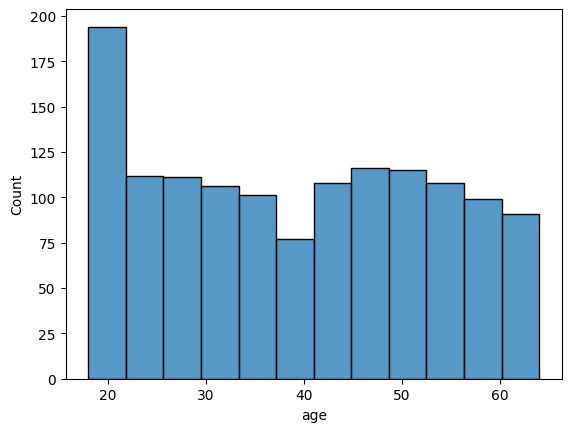

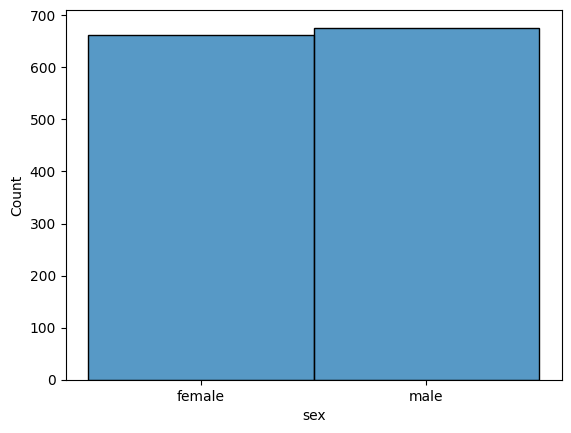

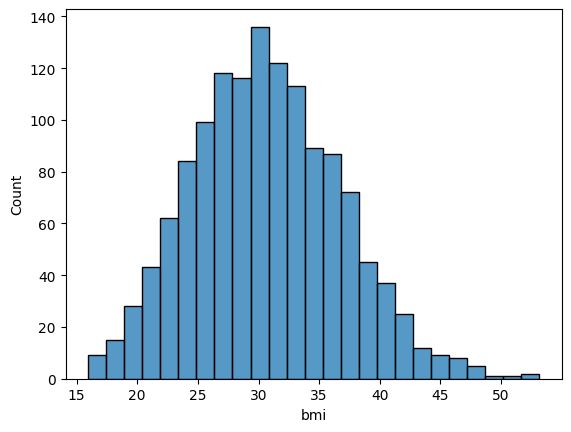

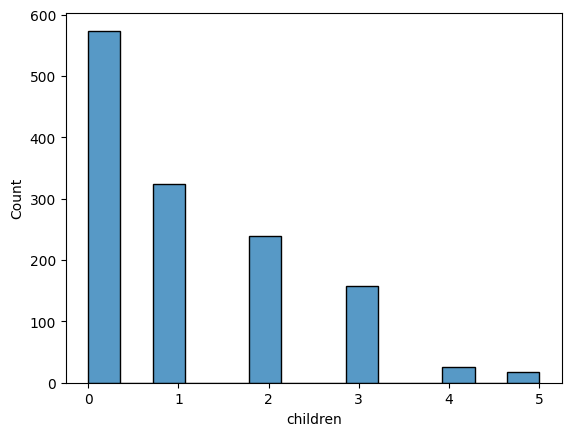

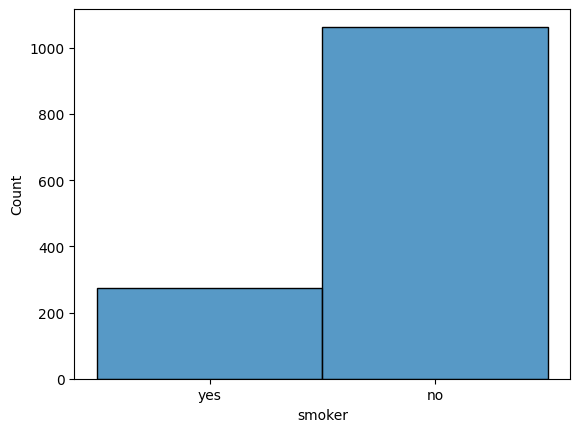

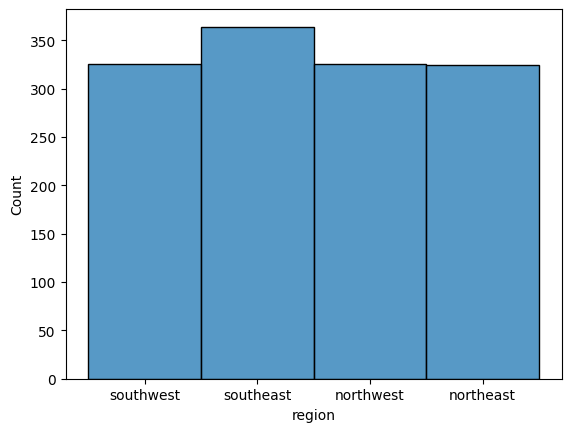

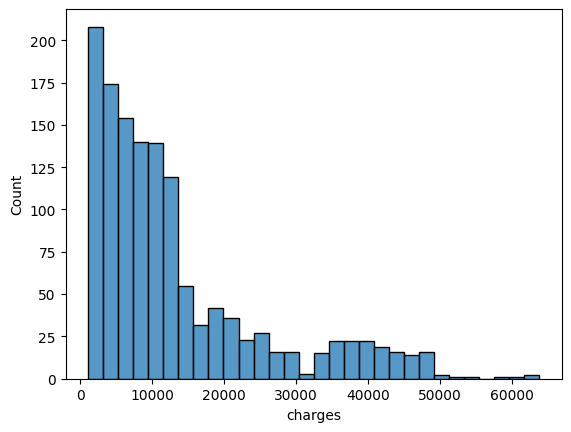

In [125]:
import seaborn as sns #시각화를 위한 seaborn, marplotlib.pyplot 호출
import matplotlib.pyplot as plt 
for col in df.columns: # 모든 column들의 히스토그램 그리기
    sns.histplot(data=df, x=col)
    plt.show() # 이상치를 확인한 결과 age, children, charge가 정규분포의 형태가 아니지만, 이 열을 제거할 경우 열의 개수가 굉장히 작아져 모델의 정확성이 매우 감소할 것이다. 따라서 이 열을 유지한다.


In [126]:
Y_colname = ['charges'] #종속변수 열 지정
X_colname = [x for x in df.columns if x not in Y_colname] #나머지 독립변수로 지정
Y_colname, X_colname #종속변수와 독립변수 출력


(['charges'], ['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

In [127]:
from sklearn.model_selection import train_test_split
# sklearn 패키지 내 model_selection 모듈에서 train_test_split 함수 호출
train_test_split(df[X_colname], df[Y_colname], 
                 test_size=0.2, random_state=123)
# train_test_split 함수를 사용해 X_train, Y_train, X_test, Y_test 4개의 집단으로 구분하기

[      age     sex   bmi  children smoker     region
 67     40    male 26.32         1     no  northwest
 736    37  female 38.39         0    yes  southeast
 310    50    male 26.60         0     no  southwest
 963    46    male 24.80         3     no  northeast
 680    21  female 17.40         1     no  southwest
 ...   ...     ...   ...       ...    ...        ...
 1238   37    male 22.70         3     no  northeast
 1147   20  female 31.92         0     no  northwest
 106    19  female 28.40         1     no  southwest
 1041   18    male 23.09         0     no  northeast
 1122   53  female 36.86         3    yes  northwest
 
 [1070 rows x 6 columns],
       age     sex   bmi  children smoker     region
 650    49  female 42.68         2     no  southeast
 319    32    male 37.34         1     no  northeast
 314    27  female 31.40         0    yes  southwest
 150    35    male 24.13         1     no  northwest
 336    60    male 25.74         0     no  southeast
 ...   ...     ...

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                    test_size=0.2, random_state=123)
# train_test_split 함수를 사용해 X_train, Y_train, X_test, Y_test 4개의 집단으로 구분하기
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1070, 6) (1070, 1)
(268, 6) (268, 1)


In [129]:
display(X_test, Y_test)

,age,sex,bmi,children,smoker,region
650,49,female,42.68,2,no,southeast
319,32,male,37.34,1,no,northeast
314,27,female,31.40,0,yes,southwest
150,35,male,24.13,1,no,northwest
336,60,male,25.74,0,no,southeast
...,...,...,...,...,...,...
873,43,male,30.10,1,no,southwest
746,34,male,27.00,2,no,southwest
275,47,female,26.60,2,no,northeast
186,26,female,29.92,2,no,southeast


,charges
650,"9,800.89"
319,"4,667.61"
314,"34,838.87"
150,"5,125.22"
336,"12,142.58"
...,...
873,"6,849.03"
746,"11,737.85"
275,"9,715.84"
186,"3,981.98"


In [130]:
#범주형 변수는 성별, 흡연여부, 거주지역이다. 이 열은 모두 문자이므로 숫자 형태로 변환해 컴퓨터가 이해할 수 있게 해야한다.
if ('sex' in X_train.columns) and ('smoker' in X_train.columns) and ('region' in X_train.columns):
    df_dummy = pd.get_dummies(X_train[['sex', 'smoker', 'region']])
    X_train = pd.concat([X_train[['age', 'bmi', 'children']], df_dummy], axis=1)
    
    # 원래항목 삭제
    for col in ['sex', 'smoker', 'region']:
        if col in X_train.columns:
            X_train = X_train.drop(col, axis=1)
            
display(X_train)


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
67,40,26.32,1,0,1,1,0,0,1,0,0
736,37,38.39,0,1,0,0,1,0,0,1,0
310,50,26.60,0,0,1,1,0,0,0,0,1
963,46,24.80,3,0,1,1,0,1,0,0,0
680,21,17.40,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1238,37,22.70,3,0,1,1,0,1,0,0,0
1147,20,31.92,0,1,0,1,0,0,1,0,0
106,19,28.40,1,1,0,1,0,0,0,0,1
1041,18,23.09,0,0,1,1,0,1,0,0,0


In [131]:
#범주형 변수는 성별, 흡연여부, 거주지역이다. 이 열은 모두 문자이므로 숫자 형태로 변환해 컴퓨터가 이해할 수 있게 해야한다.
if ('sex' in X_test.columns) and ('smoker' in X_test.columns) and ('region' in X_test.columns):
    df_dummy = pd.get_dummies(X_test[['sex', 'smoker', 'region']])
    X_test = pd.concat([X_test[['age', 'bmi', 'children']], df_dummy], axis=1)
    
    # 원래항목 삭제
    for col in ['sex', 'smoker', 'region']:
        if col in X_test.columns:
            X_test = X_test.drop(col, axis=1)
            
display(X_test)



,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
650,49,42.68,2,1,0,1,0,0,0,1,0
319,32,37.34,1,0,1,1,0,1,0,0,0
314,27,31.40,0,1,0,0,1,0,0,0,1
150,35,24.13,1,0,1,1,0,0,1,0,0
336,60,25.74,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
873,43,30.10,1,0,1,1,0,0,0,0,1
746,34,27.00,2,0,1,1,0,0,0,0,1
275,47,26.60,2,1,0,1,0,1,0,0,0
186,26,29.92,2,1,0,1,0,0,0,1,0


In [132]:
from sklearn import preprocessing #sklearn 모듈내 preprocessing 함수 호출해 변수 저장
scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit(X_train) # X_train데이터 scaling 적용을 위해 파라미터 추정 및 그 파라미터를 X_train 데이터에 적용해 변수 크기 맞추기
pd.DataFrame(scaler_fit.transform(X_train), columns=X_train.columns, index=X_train.index)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
67,0.48,0.28,0.20,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00
736,0.41,0.60,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
310,0.70,0.29,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
963,0.61,0.24,0.60,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00
680,0.07,0.04,0.20,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
1238,0.41,0.18,0.60,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00
1147,0.04,0.43,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
106,0.02,0.33,0.20,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
1041,0.00,0.19,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00


In [133]:
X_train_fes = pd.DataFrame(scaler_fit.transform(X_train),
                           index=X_train.index, columns=X_train.columns)
X_test_fes = pd.DataFrame(scaler_fit.transform(X_test),
                           index=X_test.index, columns=X_test.columns) # X_test, X_train 전처리 코드 정리 및 결과 생성
display(X_train_fes, X_test_fes)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
67,0.48,0.28,0.20,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00
736,0.41,0.60,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
310,0.70,0.29,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
963,0.61,0.24,0.60,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00
680,0.07,0.04,0.20,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
1238,0.41,0.18,0.60,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00
1147,0.04,0.43,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
106,0.02,0.33,0.20,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
1041,0.00,0.19,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
650,0.67,0.72,0.40,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
319,0.30,0.58,0.20,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00
314,0.20,0.42,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
150,0.37,0.22,0.20,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00
336,0.91,0.26,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
873,0.54,0.38,0.20,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
746,0.35,0.30,0.40,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
275,0.63,0.29,0.40,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
186,0.17,0.38,0.40,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [134]:
display(X_train_fes.describe(), X_test_fes.describe()) # 변환된 최종 X_test, X_train 통계량 확인

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,"1,070.00","1,070.00","1,070.00","1,070.00","1,070.00","1,070.00","1,070.00","1,070.00","1,070.00","1,070.00","1,070.00"
mean,0.46,0.40,0.22,0.49,0.51,0.80,0.20,0.24,0.25,0.28,0.23
std,0.31,0.16,0.24,0.50,0.50,0.40,0.40,0.43,0.43,0.45,0.42
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.28,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,0.46,0.39,0.20,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,1.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.47,0.40,0.23,0.50,0.50,0.78,0.22,0.26,0.21,0.25,0.29
std,0.30,0.17,0.23,0.50,0.50,0.42,0.42,0.44,0.40,0.43,0.46
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.26,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,0.46,0.40,0.20,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.51,0.40,1.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00
max,1.00,0.85,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# **Applying Base Algorithm:** Linear Regression

**1)** `비즈니스 목적` 달성을 위해 `선형회귀분석(Linear Regression) 알고리즘만을` 사용하여 `학습 및 예측(Train & Test 모두)` 진행

**2)** `Train & Test` 데이터의 예측 결과를 `시각화로 표현`하여 얼마나 정확한지 확인

**3)** 위의 예측 시각화로 `어떤 데이터가 성능이 좋은지 및 그 이유`를 주석으로 작성

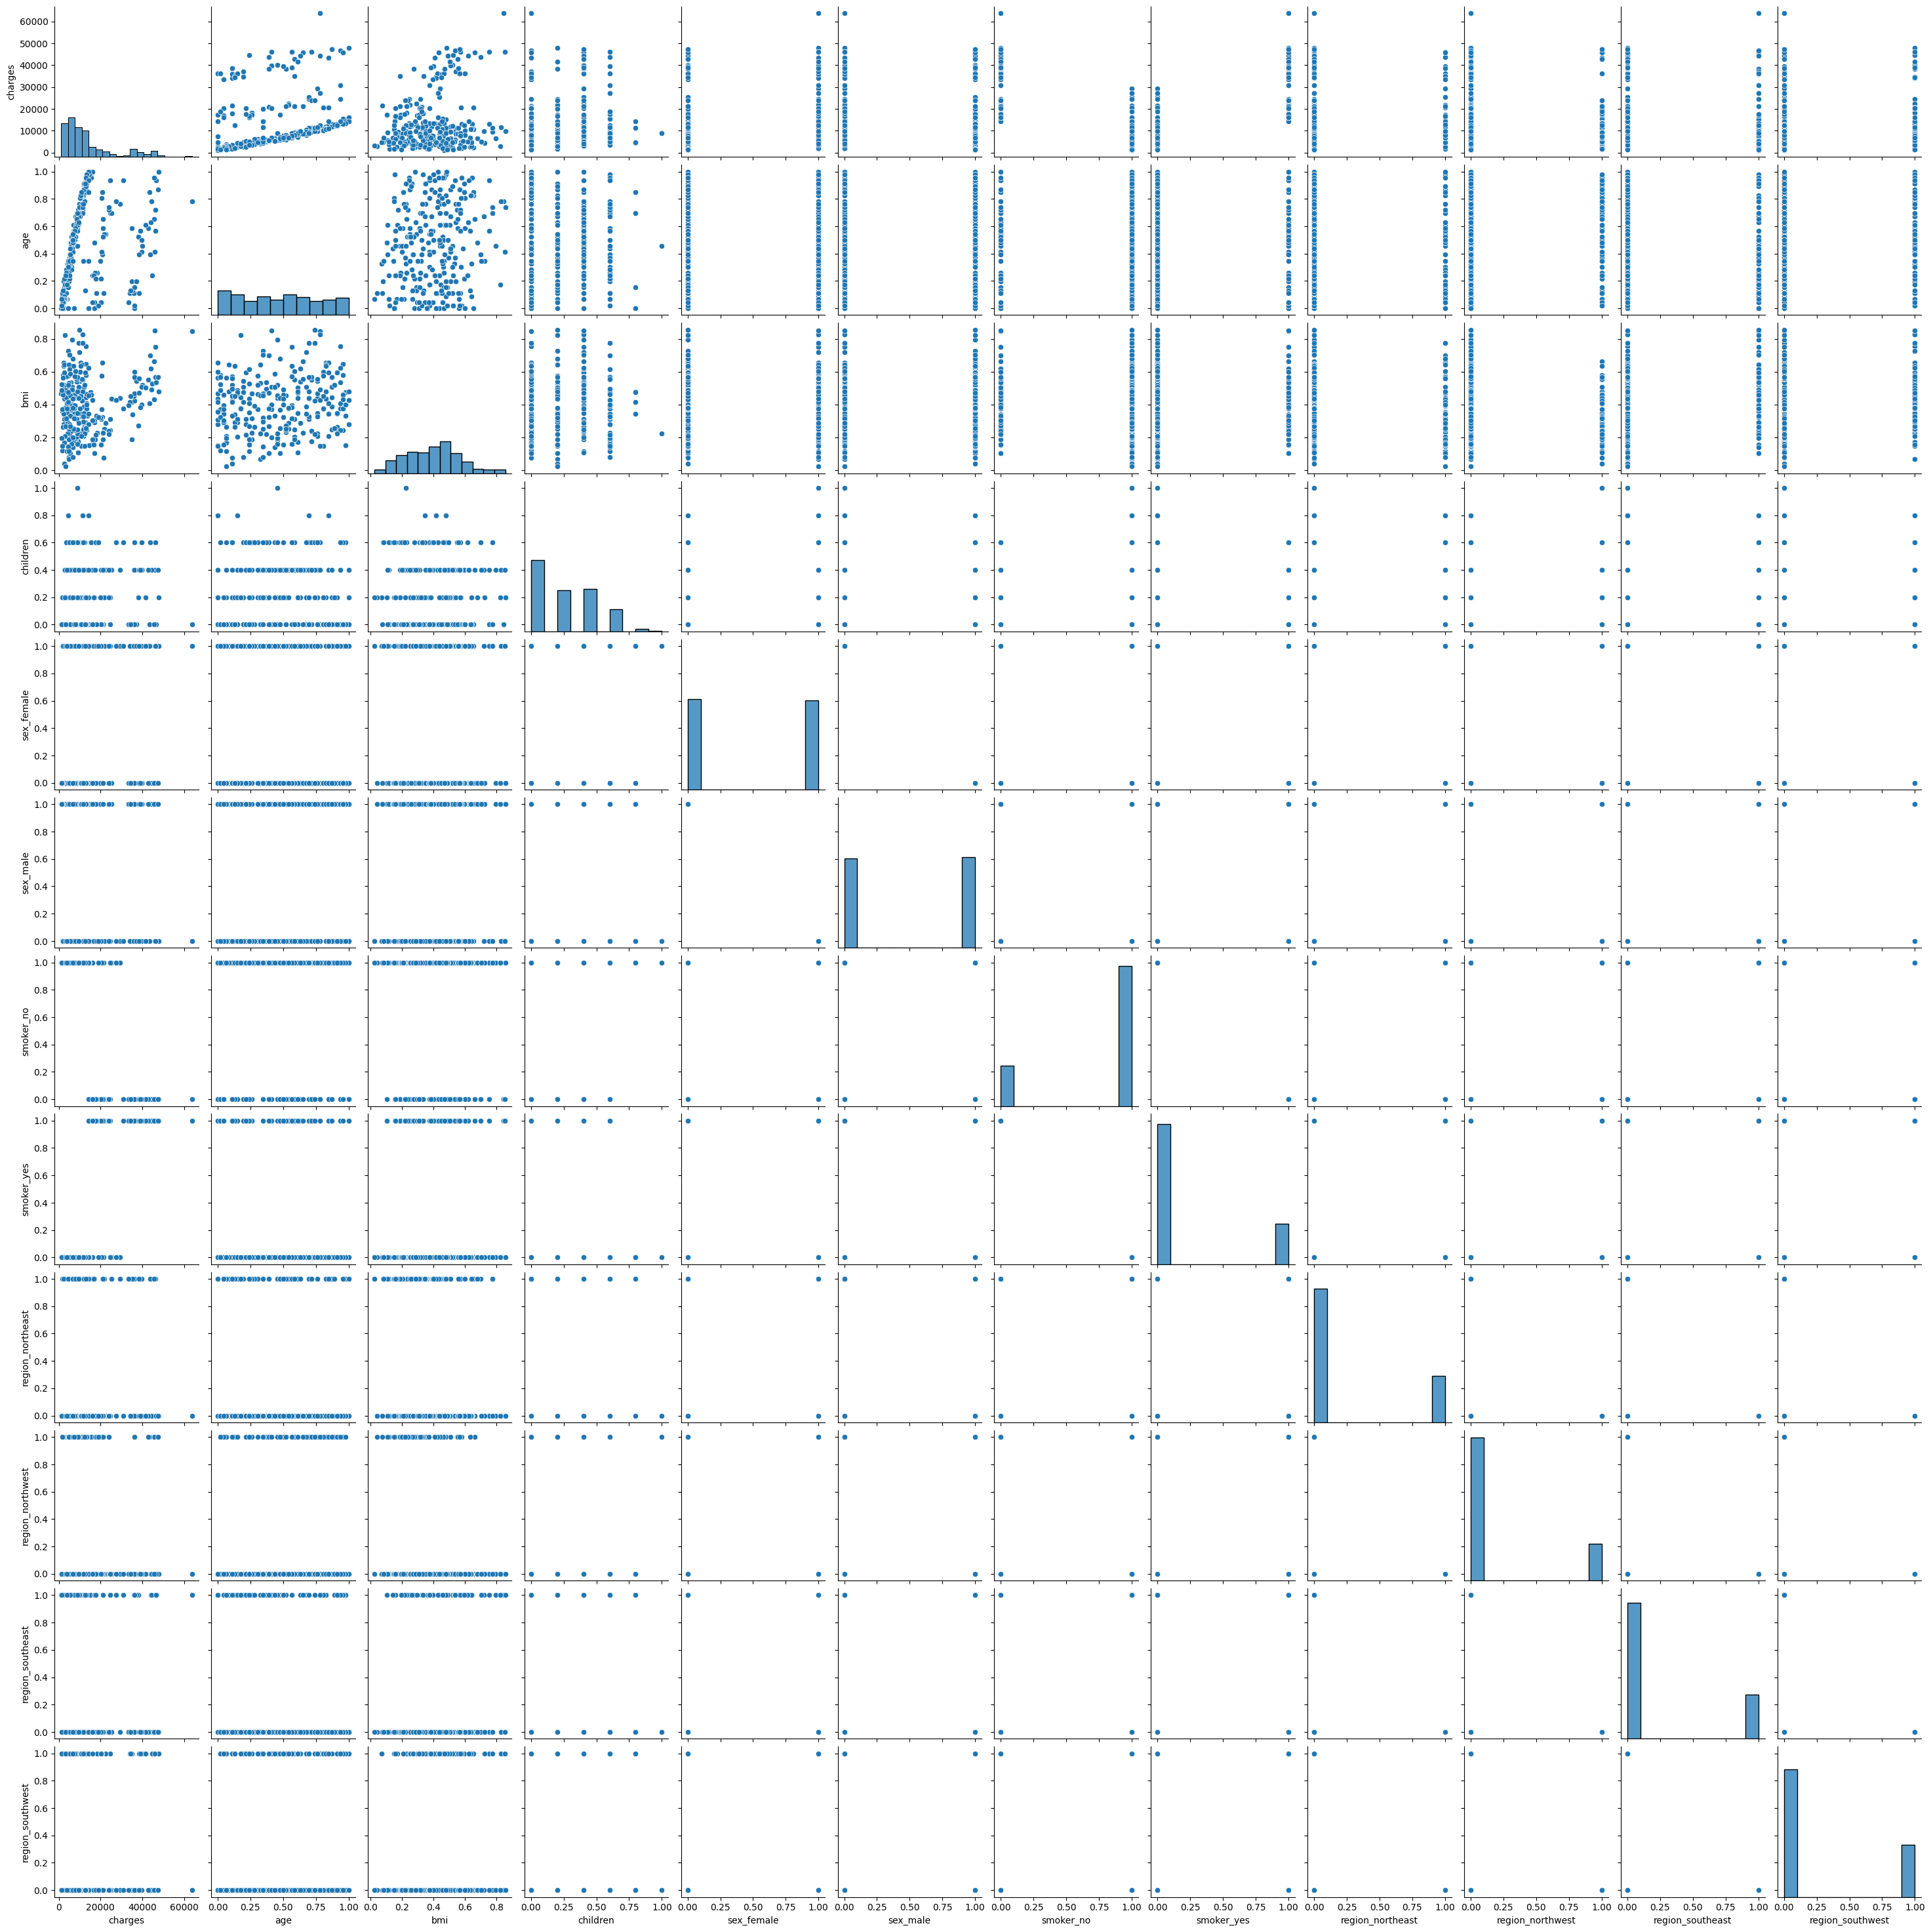

In [135]:
YX_train = pd.concat([Y_train, X_train_fes], axis=1)
YX_test = pd.concat([Y_test, X_test_fes], axis=1) # 종속변수와 독립변수의 관계 확인을 위해 데이터 붙이기
YX_test.corr() # 종속변수와 독립변수의 상관관계 확인
sns.pairplot(YX_test)
plt.show()

In [136]:
X_train_fes.describe(include='all').T # 모든 X_train 데이터의 값들의 통계량

,count,mean,std,min,25%,50%,75%,max
age,"1,070.00",0.46,0.31,0.00,0.17,0.46,0.72,1.00
bmi,"1,070.00",0.40,0.16,0.00,0.28,0.39,0.50,1.00
children,"1,070.00",0.22,0.24,0.00,0.00,0.20,0.40,1.00
sex_female,"1,070.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00
sex_male,"1,070.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00
smoker_no,"1,070.00",0.80,0.40,0.00,1.00,1.00,1.00,1.00
smoker_yes,"1,070.00",0.20,0.40,0.00,0.00,0.00,0.00,1.00
region_northeast,"1,070.00",0.24,0.43,0.00,0.00,0.00,0.00,1.00
region_northwest,"1,070.00",0.25,0.43,0.00,0.00,0.00,1.00,1.00
region_southeast,"1,070.00",0.28,0.45,0.00,0.00,0.00,1.00,1.00


In [137]:
X_train_fes.info() # 모든 값들이 숫자로 반영되있는지 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 67 to 1122
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1070 non-null   float64
 1   bmi               1070 non-null   float64
 2   children          1070 non-null   float64
 3   sex_female        1070 non-null   float64
 4   sex_male          1070 non-null   float64
 5   smoker_no         1070 non-null   float64
 6   smoker_yes        1070 non-null   float64
 7   region_northeast  1070 non-null   float64
 8   region_northwest  1070 non-null   float64
 9   region_southeast  1070 non-null   float64
 10  region_southwest  1070 non-null   float64
dtypes: float64(11)
memory usage: 100.3 KB


In [138]:
import statsmodels.api as sm # statsmodels.api를 sm 이름으로 호출

X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes) # 데이터 전체의 왜곡을 줄이기 위해 Y절편 또는 상수항 출력을 위한 상수 변수 추가
X_test_fes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 650 to 1252
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             268 non-null    float64
 1   age               268 non-null    float64
 2   bmi               268 non-null    float64
 3   children          268 non-null    float64
 4   sex_female        268 non-null    float64
 5   sex_male          268 non-null    float64
 6   smoker_no         268 non-null    float64
 7   smoker_yes        268 non-null    float64
 8   region_northeast  268 non-null    float64
 9   region_northwest  268 non-null    float64
 10  region_southeast  268 non-null    float64
 11  region_southwest  268 non-null    float64
dtypes: float64(12)
memory usage: 27.2 KB


In [139]:
model_lr = sm.OLS(Y_train, X_train_fes).fit() #회귀분석 실행, model 변수에 저장
model_lr.summary() # model 변수 결과 요약 및 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          5.65e-302
Time:                        15:59:01   Log-Likelihood:                -10856.
No. Observations:                1070   AIC:                         2.173e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4146.3879    266.558     15.555      0.000    3623.348    4669.428
age               1.176e+04    621.965     18.907      0.000    1.05e+04     1.3e+04
bmi               1.274e+04   1231.070     10.347      0.000    1.03e+04    1.52e+04
children          2257.9364    778.024      2.902      0.004     731.295    3784.578
sex_female        2114.9148    229.917      9.199      0.000    1663.771    2566.059
sex_male          2031.4731    234.979      8.645      0.000    1570.396    2492.550
smoker_no        -9677.3115    246.175    -39.311      0.000   -1.02e+04   -9194.267
smoker_yes        1.382e+04    297.297     46.498      0.000    1.32e+04    1.44e+04
region_northeast  1656.3074    337.452      4.908      0.000     994.157    2318.457
region_northwest  1237.0873    331.125      3.736      0.000     587.353    1886.822
region_southeast   623.0337    349.129      1.785      0.075     -62.028    1308.096
region_southwest   629.9595    344.435      1.829      0.068     -45.891    1305.810
==============================================================================
Omnibus:                      260.172   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.154
Skew:                           1.303   Prob(JB):                    5.88e-135
Kurtosis:                       5.660   Cond. No.                     1.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [140]:
model_lr.predict(X_train_fes) # 학습된 모델을 사용해 X_train 값 예측
pd.DataFrame(model_lr.predict(X_train_fes), columns=['Pred']) # 예측된 값을 DataFrame 형식으로 바꾸고 열 이름을 'Pred'로 출력

,Pred
67,"7,361.88"
736,"33,251.56"
310,"8,957.30"
963,"9,697.29"
680,"-1,074.07"
...,...
1238,"6,680.27"
1147,"3,801.48"
106,"2,184.08"
1041,598.42


In [141]:
Y_trpred = pd.DataFrame(model_lr.predict(X_train_fes), columns=['Pred'])
Y_tepred = pd.DataFrame(model_lr.predict(X_test_fes), columns=['Pred'])
# 학습된 모델을 사용해 X_train 과 X_test 값 예측과 변수로 저장
pd.concat([Y_train, Y_trpred], axis=1) # 실제 Y_train과 예측치인 Y_trpred 붙여서 비교. 실제로 둘의 값이 유사

,charges,Pred
67,"6,389.38","7,361.88"
736,"40,419.02","33,251.56"
310,"8,444.47","8,957.30"
963,"9,500.57","9,697.29"
680,"2,585.27","-1,074.07"
...,...,...
1238,"6,985.51","6,680.27"
1147,"2,261.57","3,801.48"
106,"2,331.52","2,184.08"
1041,"1,704.70",598.42


In [142]:
pd.concat([Y_test, Y_tepred], axis=1) # 실제 Y_test과 예측치인 Y_tepred 붙여서 비교. 실제로 둘의 값이 유사

,charges,Pred
650,"9,800.89","15,191.57"
319,"4,667.61","9,512.21"
314,"34,838.87","28,306.71"
150,"5,125.22","5,334.89"
336,"12,142.58","11,212.14"
...,...,...
873,"6,849.03","8,818.72"
746,"11,737.85","5,907.18"
275,"9,715.84","10,203.32"
186,"3,981.98","4,939.14"


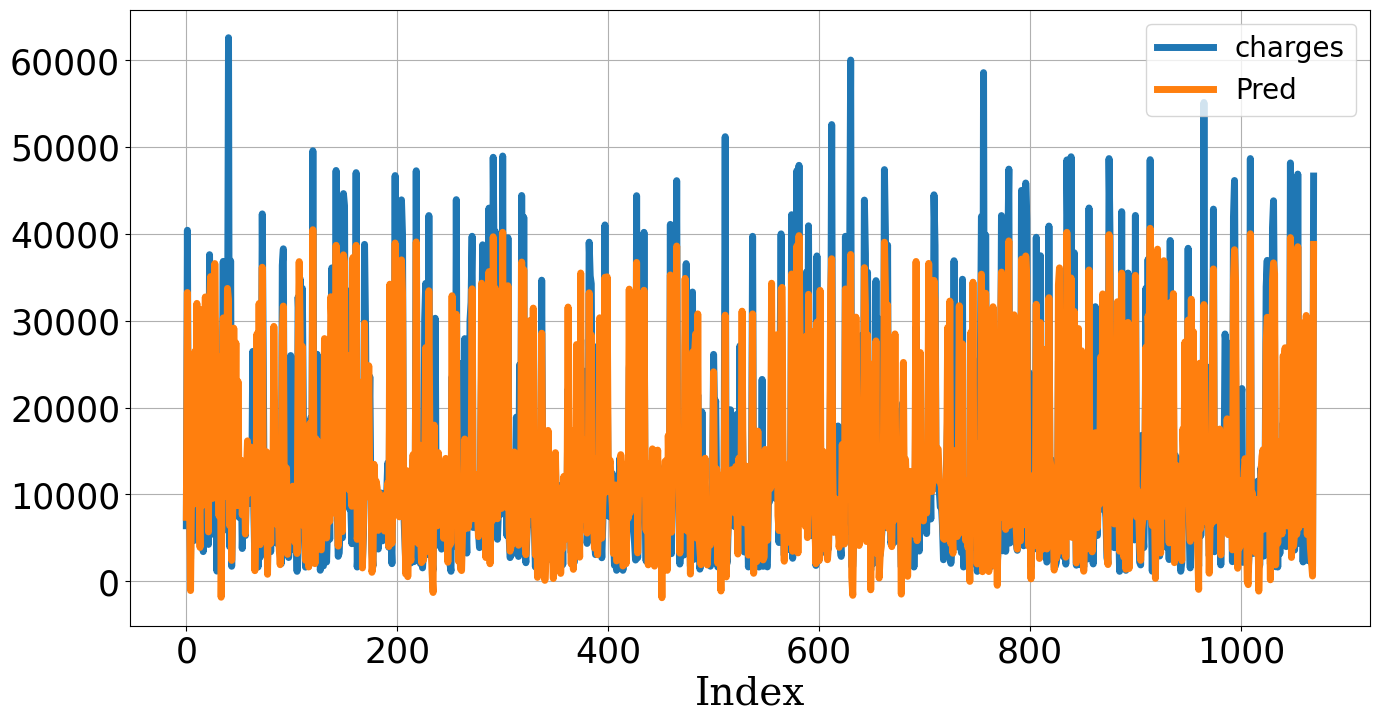

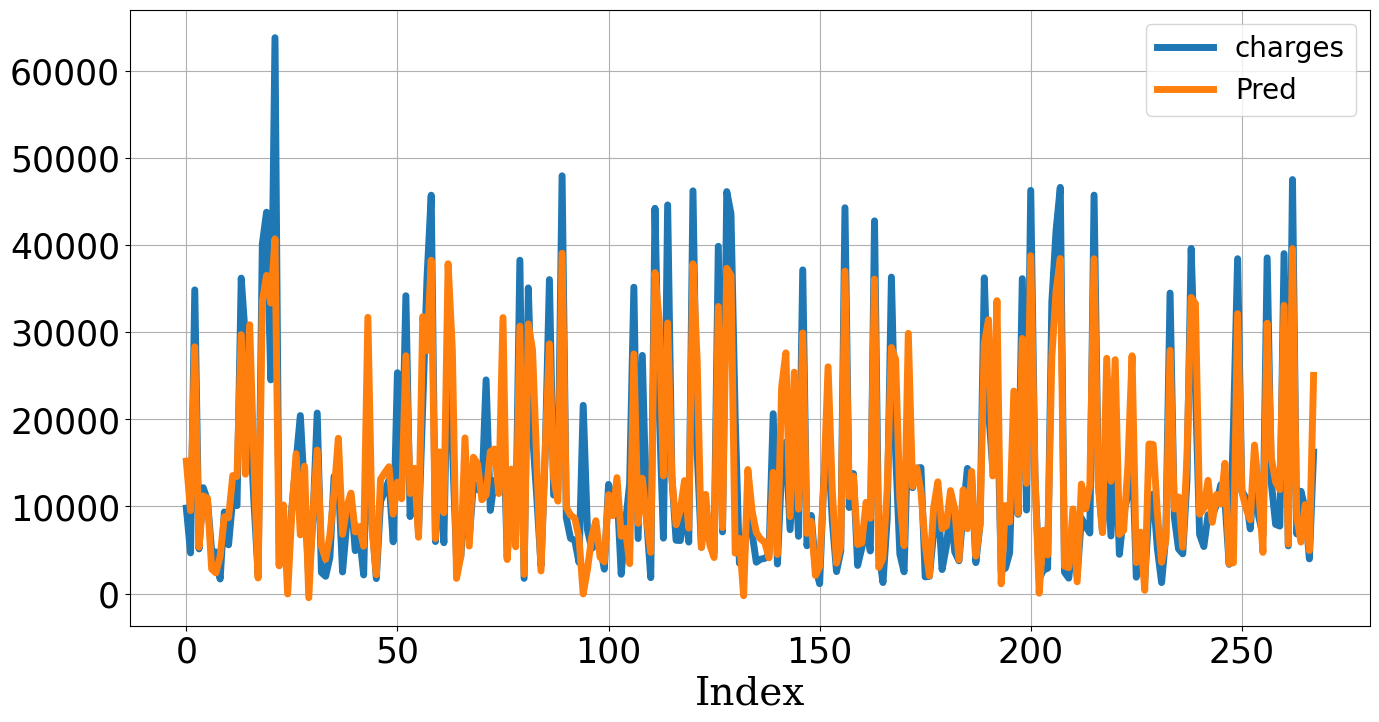

In [143]:
def plot_prediction(Y_true_pred):
    plt.figure(figsize=(16, 8))
    plt.plot(Y_true_pred, linewidth=5, label=Y_true_pred.columns)
    plt.xticks(fontsize=25, rotation=0)
    plt.yticks(fontsize=25)
    plt.xlabel('Index', fontname='serif', fontsize=28)
    plt.legend(fontsize=20)
    plt.grid()
    plt.show()

plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:]) # 실제 Y와 예측치 시각화. test는 train만큼 예측하지 못했지만, 그럼에도 방향성을 잘 예측했다.

# **Evaluation:** 분석 성능 확인/평가하기 

**1) `Train Performance`**

- `t-검정 결과`로 `각 변수 결과로 종속변수에 미치는 영향 수치`를 사용하여 표현할 것
- 분석 성능을 확인하기 위해 반드시 `5가지 종류`의 `R-squared, Adjusted R-squared, MAE, MSE, MAPE`를 출력

**2) `Train & Test Performance`**

- `3가지 MAE, MSE, MAPE`를 모두 출력하고 `어떤것이 성능이 좋은지 및 그 이유를 주석으로 의견` 반영

In [144]:
import statsmodels.api as sm

# OLS 모델 생성 및 학습
model = sm.OLS(Y_train, sm.add_constant(X_train))
results = model.fit()

# t-검정 결과 출력 및 R-squared, Adj. R-squared 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          5.65e-302
Time:                        15:59:21   Log-Likelihood:                -10856.
No. Observations:                1070   AIC:                         2.173e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -329.5060    497.261  

In [145]:
import numpy as np
# MSE, MAE, MAPE 출력 (train)
MAE = mean_absolute_error(Y_train, Y_trpred)
MSE = mean_squared_error(Y_train, Y_trpred)
MAPE = mean_absolute_percentage_error(Y_train, Y_trpred)
pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T

,MAE,MSE,MAPE
Score,"4,271.27","38,024,468.96",0.44


In [146]:
# MSE, MAE, MAPE 정리 (test)
MAE = mean_absolute_error(Y_test, Y_tepred)
MSE = mean_squared_error(Y_test, Y_tepred)
MAPE = mean_absolute_percentage_error(Y_test, Y_tepred)
pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T

,MAE,MSE,MAPE
Score,"4,013.10","30,552,437.42",0.41


In [147]:
# mae, mse, mape 모두 test에서 더 낮기 때문에 test의 성능이 더 좋다. 일반적으로 train의 성능이 더 좋은데 데이터셋의 크기가 작아서 test의 성능이 더 좋게 나왔다.

# **Error Analysis:** 분석 성능/종료 판단하기

**1)** `잔차를 시각화`하여 데이터에 남아있는 패턴이 어떠한지 `확인 및 설명`하고

**2)** 향후 `모델링의 성능을 높이기 위해 어떤 전처리? 또는 어떤 모델링?`이 필요할지 의견을 주석으로 작성

In [148]:
Resid_tr = Y_train - Y_trpred.values # 잔차 추출 및 열이름 'Error'로 변경
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

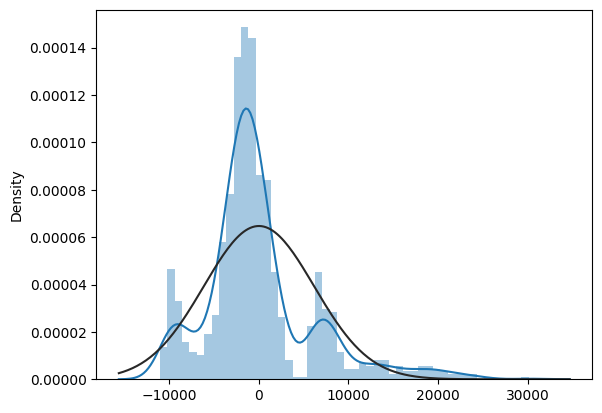

In [149]:
sns.distplot(Resid_tr, norm_hist='True', fit=stats.norm)
plt.show() # 잔차의 정규분포성 시각화, 정규분포보다 뾰족해 정규분포로 보기 어렵다.

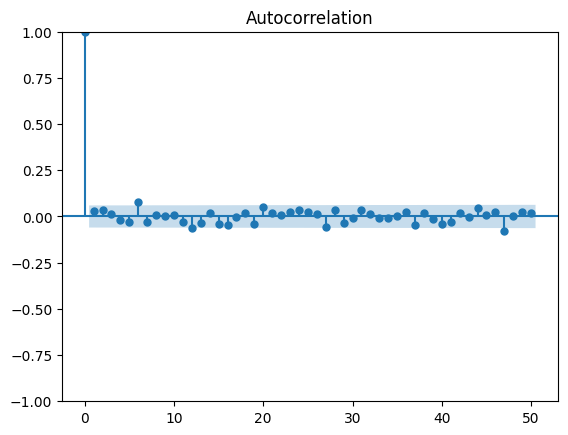

In [150]:
sm.graphics.tsa.plot_acf(Resid_tr, lags=50, use_vlines=True)
plt.show() # 잔차의 자기상관성 시각화, 0에 가깝기 때문에 자기상관이 없는 것으로 보인다.

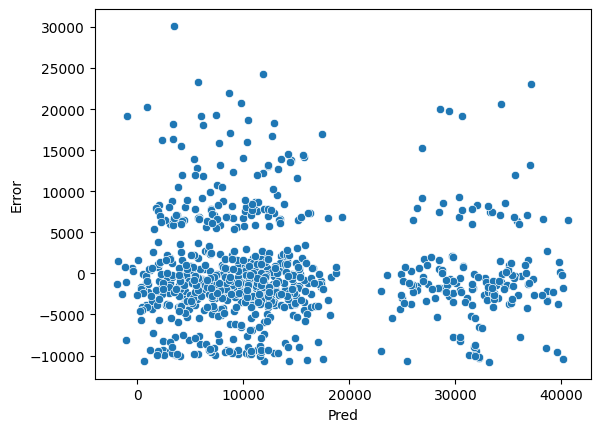

In [151]:
temp = pd.concat([Y_trpred, Resid_tr.reset_index().iloc[:,[1]]], axis=1)
sns.scatterplot(x='Pred', y='Error', data=temp)
plt.show() # 잔차의 등분산성 시각화, 퍼지 있지 않기 떄문에 등분산이다.

In [152]:
# 잔차의 정규분포, 자기상관, 등분산성을 통계량으로 확인
Normality = pd.DataFrame([stats.shapiro(Resid_tr)],
                         index=['normality'], columns=['Test Statistics', 'p-value']).T
Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr, lags=[10,50]).iloc[:,0]),
                             pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr, lags=[10,50]).iloc[:,1])], axis=1).T
Autocorrelation.index = ['Test Statistics', 'p-value']
Autocorrelation.columns = ['Autocorr(lag10)', 'Autocorr(lag50)']
Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Resid_tr, X_train_fes.values, alternative='two-sided')],
                                  index=['Heteroscedasticity'],
                                  columns=['Test Statistics', 'p-value', 'Alternative']).T
Error_Analysis = pd.concat([Normality, Autocorrelation, Heteroscedasticity], join='outer', axis=1)
Error_Analysis

,normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.89,11.58,57.76,1.14
p-value,0.00,0.31,0.21,0.14
Alternative,NaN,NaN,NaN,two-sided


In [153]:
# 이상치 전처리과정을 추가로 진행해 모델링에 성능을 높일 수 있을 수 있다. 선형회귀 모델에서 정규화가 추가된 LASSO regression 모델링을 사용해 불필요한 변수를 제거해 과적합을 방지해 성능을 높일 수 있다. 

# **Business Insight and Application: 분석결과의 비즈니스 활용 기획 및 전략**

- 위에서 분석한 결과를 사용하여 데이터의 `비즈니스 목적` 달성을 위해 어떻게 `비즈니스를 하면 좋을지 기획 또는 전략 의견을 주석으로 자유 작성`

In [154]:
# 고객세분화 전략: 분석 결과를 바탕으로 고객을 세분화한다. 예를들어, 나이, 성별, 흡연여부, 지역등을 기반으로 고객을 세분화해, 세분화된 고객 정보를 바탕으로 맞춤형 서비스를 진행한다.

In [155]:
# 새로운 비즈니스 탐색: 분석 결과를 활용해 보험상품에 적용하는 것 외에도 세분화된 고객의 니즈를 충족시킬 상품을 탐색한다. 예를들어, 건강관리 서비스와 보험을 연계시키는 상품을 고려해볼 수 있다.

In [156]:
# 위험요인 분석: 분석 결과를 활용해 보험료를 다르게 책정할 수 있다. 예를들어, 비흡연자에게 보험료를 낮게 책정하는 방안을 고려해 볼 수 있다.

In [157]:
### 종료 및 본인정보 반영
# 반드시 이 cell을 실행하시오
# 실행하지 않을 시 직접 하지 않은 것으로 간주
# 마지막 줄 출력으로 파일명을 설정하고 제출 필수
import platform, psutil, os, datetime
print(platform.processor())
print(str(round(psutil.virtual_memory().total / (1024.0 **3)))+"(GB)")
print(platform.system())
print(platform.version())
print(os.getcwd())
print(datetime.datetime.fromtimestamp(os.path.getctime(os.getcwd())))
print(datetime.datetime.fromtimestamp(os.path.getmtime(os.getcwd())))
print(datetime.datetime.fromtimestamp(os.path.getatime(os.getcwd())))
print(datetime.datetime.now())
title = 'DA_SupervisedRegression'    # 고정값
name = '허유빈'    # 본인 이름을 작성
studentid = '202000251'    # 본인 학번을 작성
# 아래 강좌 명 중 본인이 수강하는 강과명 작성
# 비즈니스데이터사이언스이해, E정보시스템, 디지털비즈니스애널리틱스, E데이터베이스, 인공지능기반의사결정, 빅데이터 등
# 비즈니스혁신을위한데이터사이언스응용, 인공지능활용디지털경제플랫폼연구 등
course = 'E데이터베이스'    
print('다음 출력을 파일명으로 설정하고 제출하시오:', name + '_' + studentid + '_' + course + '_' + title)

Intel64 Family 6 Model 142 Stepping 11, GenuineIntel
8(GB)
Windows
10.0.22621
C:\Users\허\수업
2023-03-07 21:22:07.776971
2023-04-30 15:59:38.639169
2023-04-30 15:59:38.639169
2023-04-30 15:59:44.499923
다음 출력을 파일명으로 설정하고 제출하시오: 허유빈_202000251_E데이터베이스_DA_SupervisedRegression
